# **Loan Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing & Loading the dataset

In [6]:
train_df = pd.read_csv('/train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Info:

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations from the above Info:

There are a total of 13 columns, including the target variable, and each column is self-explanatory. Some columns have missing values. For categorical columns, identify the possible values, and for numerical columns, determine their possible range



Dataset Shape:

In [8]:
train_df.shape

(614, 13)

Dataset Description:


In [35]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.863469
std,5506.461371,2543.801628,81.749385,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


Checking the Missing Values


In [13]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.



In [15]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())


In [16]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())


Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History'


In [17]:
train_df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now, Let's drop all the missing values remaining.


In [18]:
train_df.dropna(inplace=True)


Let's check the Missing values for the final time!

In [19]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.







Now, Let's check the final Dataset Shape


In [20]:
train_df.shape

(542, 13)

Exploratory Data Analyis

**Comparison between Genders in getting the Loan:**


Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


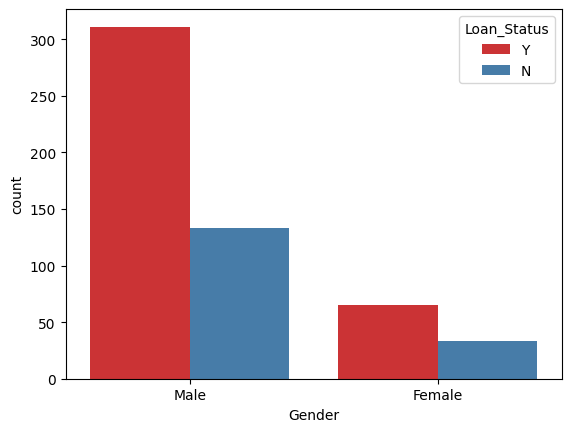

In [23]:
sns.countplot(x='Gender', hue='Loan_Status', data=train_df, palette='Set1')
print(pd.crosstab(train_df['Gender'], train_df['Loan_Status']))

**Observation :**

Here, we can see that the **Males** have more chances to get the Loan.

Comparison between Married Status in getting the Loan:

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


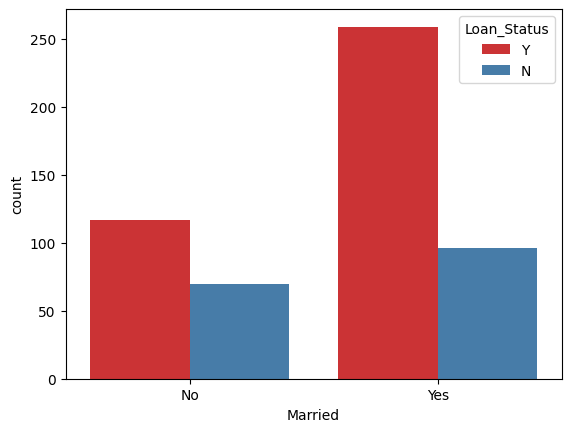

In [25]:
sns.countplot(x='Married', hue='Loan_Status', data=train_df, palette='Set1')
print(pd.crosstab(train_df['Married'], train_df['Loan_Status']))

**Observation :**

Here, we can see that the **Married Person** has more chance of getting the Loan.

Comparison between Education Status of an Individual in getting the Loan:

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


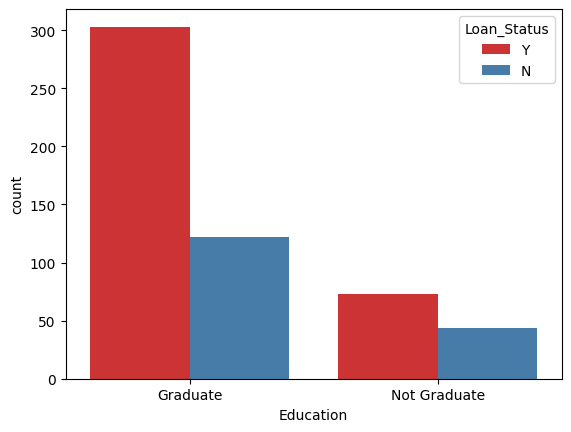

In [26]:
sns.countplot(x='Education', hue='Loan_Status', data=train_df, palette='Set1')
print(pd.crosstab(train_df['Education'], train_df['Loan_Status']))

Here, we can see that a **Graduate Individual** has more chance of getting the Loan.

**Comparison between Self-Employed or Not in getting the Loan:**



Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


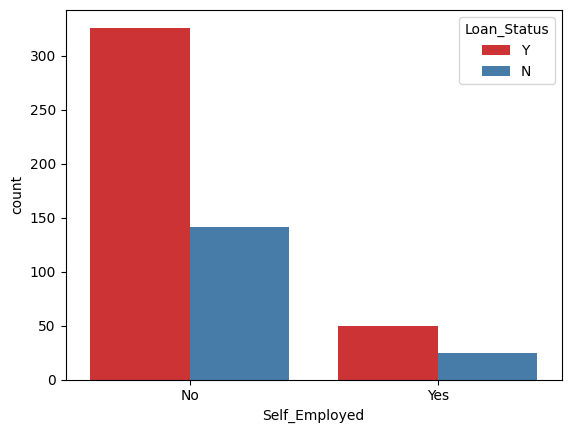

In [28]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df, palette='Set1')
print(pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status']))

Here, we can see that **Not Self-Employed** has more chance of getting the Loan.

**Comparison between Property Area for getting the Loan:**

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


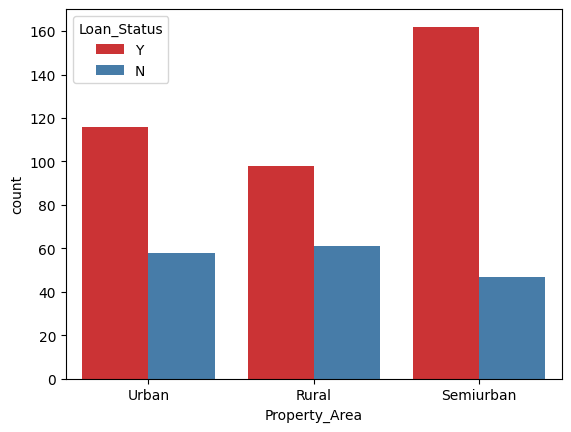

In [31]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df, palette='Set1')
print(pd.crosstab(train_df['Property_Area'], train_df['Loan_Status']))

Here, we can see that People living in **Semi-Urban** Area have more chance to get the Loan.

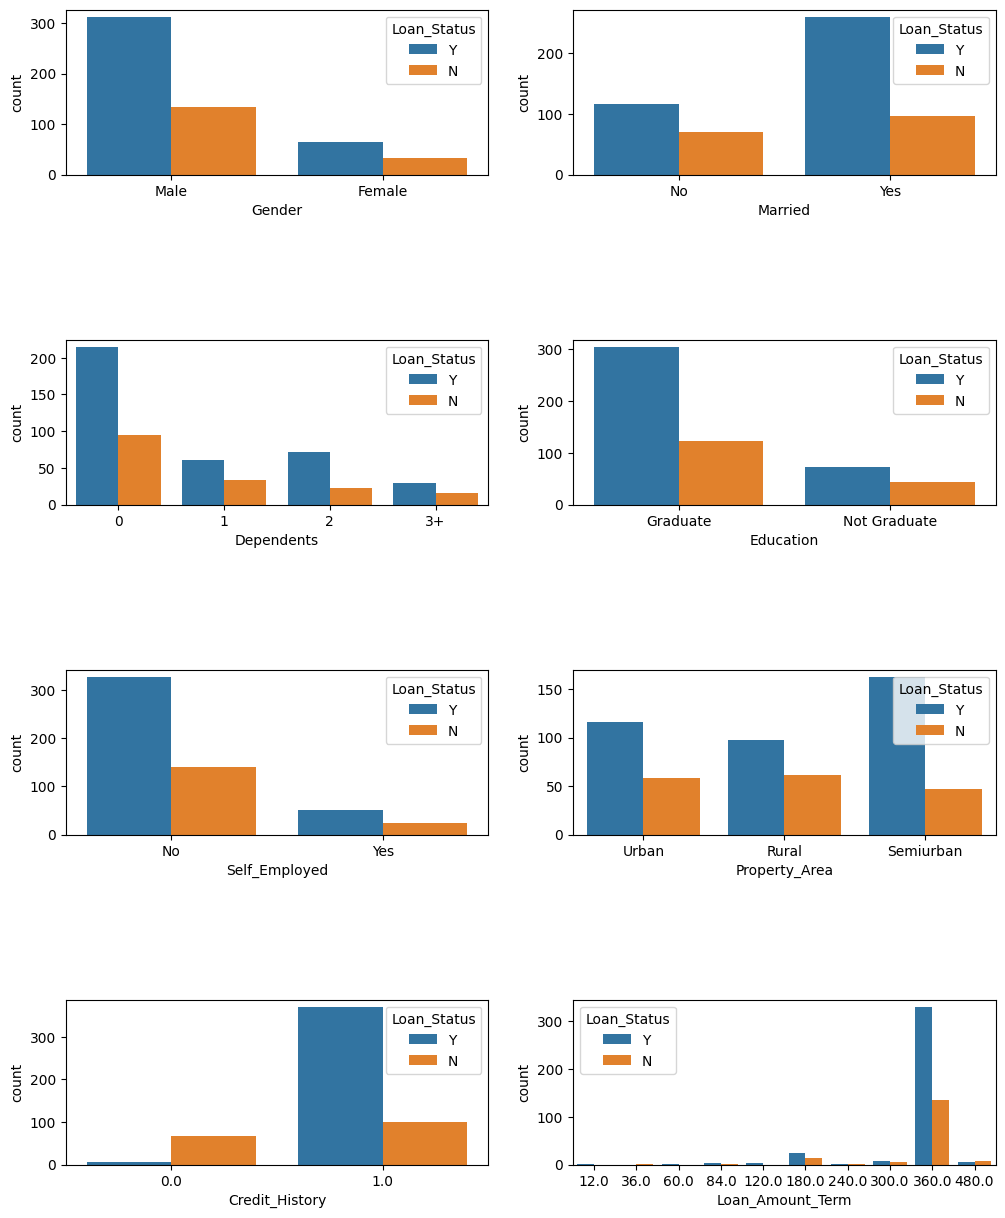

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

**Let's replace the Variable values to Numerical form & display the Value Counts**

The data in Numerical form avoids disturbances in building the model.

In [36]:
train_df['Loan_Status'].replace('Y',1,inplace=True)
train_df['Loan_Status'].replace('N',0,inplace=True)

In [37]:
train_df['Loan_Status'].value_counts()


1    376
0    166
Name: Loan_Status, dtype: int64

In [38]:
train_df.Gender=df.Gender.map({'Male':1,'Female':0})
train_df['Gender'].value_counts()

1.0    444
0.0     98
Name: Gender, dtype: int64

In [39]:
train_df.Married=df.Married.map({'Yes':1,'No':0})
train_df['Married'].value_counts()

1.0    355
0.0    187
Name: Married, dtype: int64

In [40]:
train_df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
train_df['Dependents'].value_counts()

0.0    309
1.0     94
2.0     94
3.0     45
Name: Dependents, dtype: int64

In [41]:
train_df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
train_df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [43]:
train_df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
train_df['Self_Employed'].value_counts()

0.0    467
1.0     75
Name: Self_Employed, dtype: int64

In [44]:
train_df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
train_df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [45]:
train_df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [46]:
train_df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
train_df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

**Display the Correlation Matrix**

<ipython-input-49-7323310eb432>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

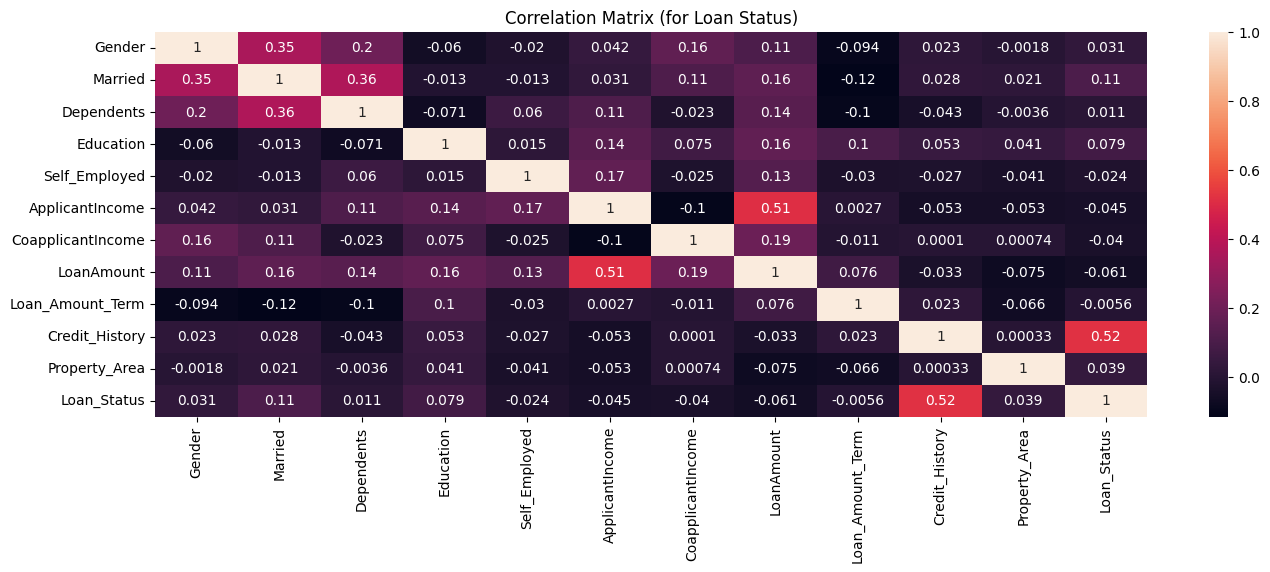

In [49]:
plt.figure(figsize=(16,5))
sns.heatmap(train_df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

From the above figure, we can see that **Credit_History** (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the **Loan_Status** is heavily dependent on the Credit_History.

**Final DataFrame**

In [50]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


**Importing Packages for Classification algorithms**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
from sklearn.exceptions import ConvergenceWarning




Splitting the data into Train and Test set

In [52]:
X = train_df.iloc[1:542,1:12].values
y = train_df.iloc[1:542,12].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [54]:
print(X_train)


[[  1.   1.   3. ... 360.   1.   0.]
 [  1.   1.   2. ... 180.   1.   2.]
 [  1.   1.   1. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   0.]
 [  0.   1.   2. ... 360.   1.   1.]]


In [55]:
print(X_test)


[[  0.   1.   2. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  1.   0.   0. ... 360.   0.   0.]
 ...
 [  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   3. ... 360.   0.   1.]]


In [56]:
print(y_train)


[1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1]


#**Model 1: Logistic Regression (LR)italicized text:**

In [79]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

model = LogisticRegression()
model.fit(X_train, y_train)

lr_prediction = model.predict(X_test)
accuracy = metrics.accuracy_score(lr_prediction, y_test)
final_val = accuracy * 100

print('Logistic Regression accuracy = {:.2f}'.format(final_val))

Logistic Regression accuracy = 81.65


#**Model 2: Support Vector Machine (SVM):**

In [80]:
model = svm.SVC()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
svc_prediction = model.predict(X_test)
accuracy = metrics.accuracy_score(svc_prediction, y_test)

print('SVM accuracy = {:.2f}'.format(accuracy * 100))

SVM accuracy = 69.72


#**Model 3: Decision Tree**:

In [81]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
dt_prediction = model.predict(X_test)
accuracy = metrics.accuracy_score(dt_prediction, y_test)

print('Decision Tree accuracy = {:.2f}'.format(accuracy * 100))

Decision Tree accuracy = 71.56


#**Model 4: K-Nearest Neighbors (KNN):**

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN model
model = KNeighborsClassifier()

# Make predictions and evaluate the model
knn_prediction = final_model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(knn_prediction, y_test)

print('KNN accuracy = {:.2f}'.format(accuracy * 100))

KNN accuracy = 80.73



**CONCLUSION:**

The Loan Status is heavily dependent on the Credit

1.   The Loan Status is heavily dependent on the Credit History for Predictions.

2.   The Logistic Regression algorithm gives us the maximum Accuracy (81% approx) compared to the other 3 Machine Learning Classification Algorithms.
